# Neural Network Modeling - Handwritting

In this lab, you will explore the fundamental steps of data science by working through three realistic tasks: analyzing text, forecasting trends from time-based data, and building neural network models. Through these tasks, you will gain experience in collecting, preprocessing, analyzing, and modeling real-world data—culminating in actionable insights and predictions that can inform better decision-making within an organization.

hrough this lab, you will practice navigating each stage of a data science project, building confidence in your technical skills and understanding how to tailor those skills to real-world challenges.

In this lab you will be handling a wide variety of tasks—from filtering support tickets to performing data-driven planning.

A separate team is experimenting with machine learning solutions for both classification and regression problems. For demonstration, they’ve given you two small datasets:
An image-based classification task (e.g., hand-written digits recognition).
A numeric dataset where the goal is to predict a target variable (e.g., the wine dataset for assessing wine quality or category).

### Lab Challenge

Neural Networks: Leverage deep learning approaches for both classification and regression, preparing you for more complex tasks like image recognition or advanced predictive analytics.

# Step 1: Load libraries and prepare the datasets

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

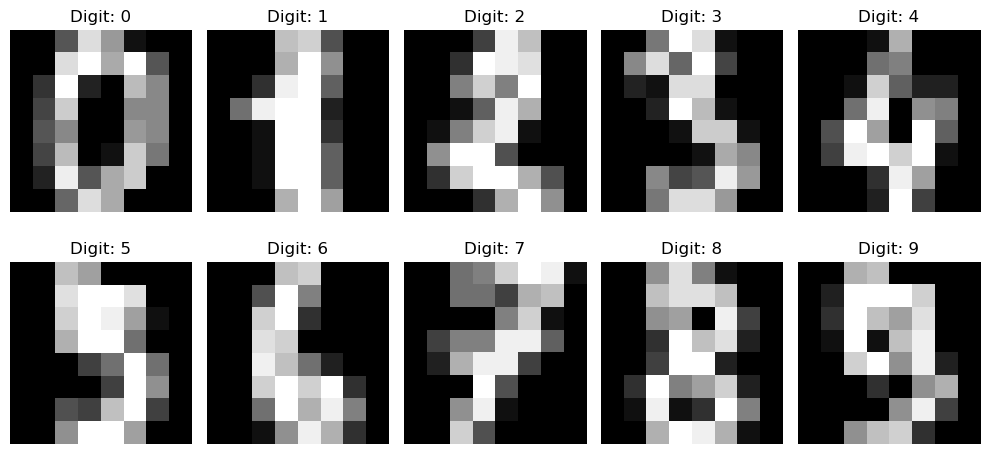

Digits dataset: 1797 samples, 64 features


In [1]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)


# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target


# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

# An image-based classification task (e.g., hand-written digits recognition).

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Business Case: Handwritten Digit Recognition**

In today’s digital economy, automating the recognition of handwritten text is a critical enabler of efficiency, especially in fields like postal services, banking (check processing), and digital archiving. Our goal is to develop a robust classification model capable of accurately identifying handwritten digits (0 through 9) from image input. This capability not only enhances data entry speed and accuracy but also reduces reliance on manual processing in scalable enterprise systems.

The target variable in this classification task is y_digits, which represents the true digit label (ranging from 0 to 9) corresponding to each image sample. The X_digits feature set contains pixel intensity values that describe the image content, and these serve as the predictors.

We will begin by loading and visualizing the Digits dataset to understand the image structure and distribution. Each image is an 8×8 grayscale representation of a single digit, resulting in 64 pixel values. These images are flattened into a 64-feature vector to make them compatible with traditional machine learning models and fully connected neural networks, which expect input in a 1D tabular format rather than 2D arrays. To solve this classification task, we will preprocess the data, split it into training and testing sets, and develop a neural network model using both TensorFlow and PyTorch. Our goal is to train the model to generalize well so it can accurately predict unseen handwritten digits, supporting broader automation and digitization efforts.

## Step 2: Preprocess data for neural networks

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
To ensure a fair evaluation of model performance, we partitioned the dataset into separate training, validation, and test sets. The validation set was used during training to monitor generalization and tune model performance, while the test set was strictly reserved for final evaluation. This prevents information leakage and ensures that reported test accuracy reflects true out-of-sample performance.

In [6]:
# First split: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits)

In [7]:
# Second split: from train_val into train (75%) and val (25%) → 60% train, 20% val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

To prepare the input features for neural network modeling, we normalized the pixel values of the digit images by dividing them by 16.0. Each image consists of 8×8 grayscale pixels with values ranging from 0 to 16; this normalization rescales all inputs to the [0, 1] range. Neural networks train faster and more reliably when input features are on a consistent scale, as normalization helps stabilize gradient updates and improves convergence.

In [8]:
# Normalize digits data (scale to [0, 1])
X_train = X_train / 16.0
X_val = X_val / 16.0
X_test = X_test / 16.0

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Standardization (zero mean, unit variance) was not applied, as it is unnecessary for bounded image data and could introduce negative values, which may conflict with activation functions such as ReLU.

By properly partitioning and normalizing the data, we reduce the risk of model bias and help ensure that the trained digit recognition system performs accurately and consistently in real-world applications, such as automated document processing or form digitization.

Unlike tabular datasets with mixed feature types, the digits dataset contains only clean, continuous numerical input (pixel intensity values). Therefore, advanced preprocessing steps such as imputation, encoding, or pipeline-based transformations were not necessary. A simple normalization step was sufficient to prepare the data for training, allowing us to bypass more complex preprocessing workflows without compromising model effectiveness.

**Baseline MLP Model for Digits Classification (10 Classes)**

In [9]:
# Define a baseline model function for multi-class classification
def create_baseline_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),         # Input layer (64 pixels per image)
        Dense(128, activation='relu'),     # First hidden layer
        Dense(64, activation='relu'),      # Second hidden layer
        Dense(10, activation='softmax')    # Output layer: 10 classes (digits 0–9)
    ])
    
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',  # Appropriate for integer-labeled multi-class tasks / labels are integer-encoded (0–9)
        metrics=['accuracy']                     # Accuracy is a good initial evaluation metric
    )
    
    return model

In [18]:
# Create and summarize the baseline model
baseline_model = create_baseline_model(X_train.shape[1])
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the baseline model
baseline_history = baseline_model.fit(
    X_train, y_train,
    epochs=30,                # Fixed number of epochs
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3794 - loss: 2.1028 - val_accuracy: 0.7250 - val_loss: 1.4970
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7471 - loss: 1.2570 - val_accuracy: 0.8528 - val_loss: 0.7941
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8878 - loss: 0.6247 - val_accuracy: 0.8833 - val_loss: 0.4892
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9207 - loss: 0.3629 - val_accuracy: 0.9139 - val_loss: 0.3461
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9464 - loss: 0.2506 - val_accuracy: 0.9333 - val_loss: 0.2706
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9601 - loss: 0.1948 - val_accuracy: 0.9389 - val_loss: 0.2260
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9699 - loss: 0.1608 - val_accuracy: 0.9472 - val_loss: 0.1985
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9747 - loss: 0.1376 - val_accuracy: 0.9472 - v

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

We trained the baseline MLP model for a fixed 30 epochs to establish a reference point for performance. This number was selected based on common practice in similar image classification tasks and provides sufficient training cycles for the model to learn meaningful patterns without overfitting. At this stage, we intentionally excluded early stopping or regularization in order to assess the model’s base learning capacity under standard training conditions. The model architecture consists of two hidden layers with 128 and 64 units, respectively, followed by a softmax output layer. The softmax activation is used to produce a probability distribution over the 10 possible digit classes (0–9), while the loss function sparse_categorical_crossentropy is appropriate because the labels are integer-encoded. This simple yet effective architecture serves as a strong baseline, and further improvements such as dropout, early stopping, or regularization can be introduced in subsequent iterations to enhance performance and generalization.

**Visualize Training and Validation curves**

In [21]:
# Evaluate the baseline model on the test set
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(X_test, y_test)
print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9513 - loss: 0.1103
Baseline Test Accuracy: 0.9667


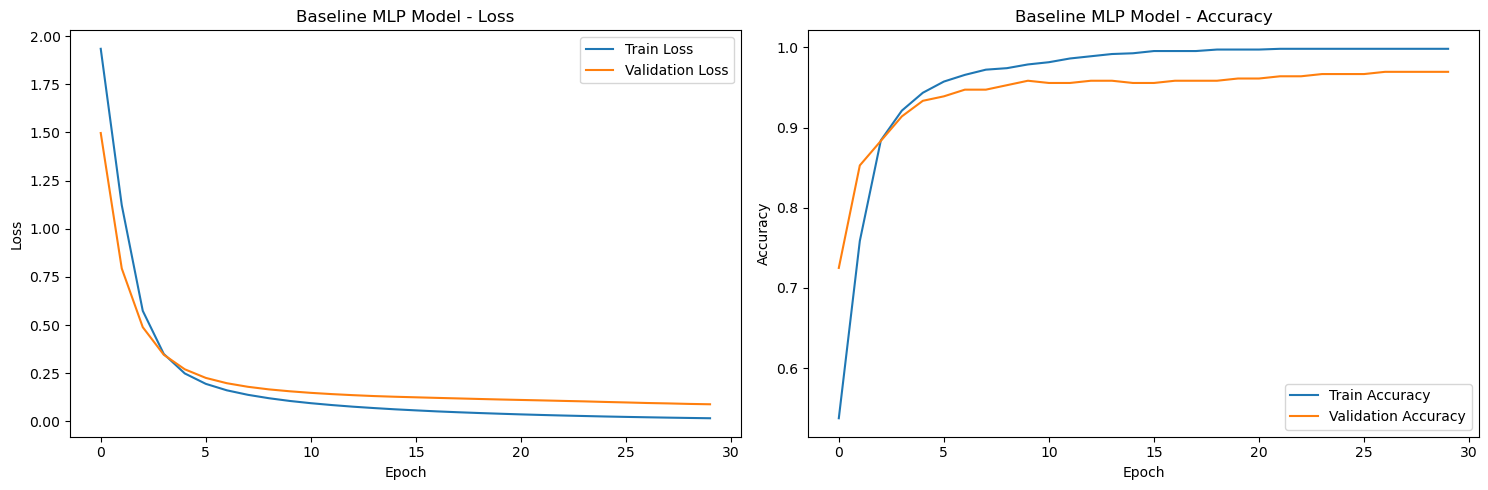

In [22]:
# Define function to plot training and validation loss/accuracy curves
def plot_training_history(history, title=''):
    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(baseline_history, title='Baseline MLP Model')

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

We evaluated the baseline model using accuracy on the held-out test set and visualized training dynamics over 30 epochs. The plotted curves provide insight into model convergence and potential overfitting or underfitting trends, helping to guide future tuning and architectural improvements.

From the charts, we observe that both training and validation loss decrease steadily, indicating effective learning without instability. Training accuracy reaches nearly 100%, while validation accuracy plateaus just above 95%, suggesting that the model generalizes well but exhibits a slight degree of overfitting in later epochs. This behavior highlights an opportunity to improve generalization further through techniques such as early stopping, dropout, or regularization.

**Implement Callbacks for Monitoring and Early Stopping**

In [26]:
# EarlyStopping: Stop training if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',         # Watch validation loss to detect overfitting
    patience=5,                 # Allow 5 epochs of no improvement before stopping
    min_delta=0.001,            # Minimum change (0.1%) in val_loss to qualify as improvement
    restore_best_weights=True   # Revert to best model weights once training stops
)

# ModelCheckpoint: Save the model only when validation loss improves
checkpoint_filepath = './best_model.keras'  # Filepath for saving the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',                     # Save based on lowest validation loss
    save_best_only=True,                    # Save only when val_loss improves
    mode='min',                             # 'min' because lower loss is better
    verbose=1                               #  Print message when a new best model is saved
)

# Combine callbacks into a list for model training
callbacks = [early_stopping, model_checkpoint]

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

To ensure the best-performing version of the model was preserved, it was implemented the ModelCheckpoint callback alongside early stopping. This callback monitors validation loss and automatically saves the model weights whenever improvement is detected. This is especially useful when combined with early stopping, as it guarantees that the final saved model represents the point of optimal validation performance—even if later epochs degrade. Including ModelCheckpoint also provides a safeguard against training interruptions and allows the saved model to be easily restored or deployed. Given the project’s tight deadline, we prioritized this lightweight monitoring tool to improve reliability without introducing unnecessary complexity such as TensorBoard (for visual tracking) and ReduceLROnPlateau (for adaptive learning rate adjustment)

In [28]:
# Create a fresh instance of the baseline model
model_with_callbacks = create_baseline_model(X_train.shape[1])  # Input dimension = 64 pixels

**Improved model**

In [31]:
# Define an improved MLP model with regularization and gradient stabilization
def create_improved_digits_model(input_dim):
    model = Sequential()
    
    # First hidden layer
    model.add(Input((input_dim,)))
    model.add(Dense(128))                  # More capacity
    model.add(BatchNormalization())        # Normalize activations
    model.add(LeakyReLU())                 # Prevent dead neurons
    model.add(Dropout(0.3))                # Dropout to reduce overfitting
    
    # Second hidden layer
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    # Output layer for 10-class classification
    model.add(Dense(10, activation='softmax'))

    # Adam optimizer with gradient clipping to stabilize training
    optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [32]:
# Create and summarize the improved model
improved_model = create_improved_digits_model(X_train.shape[1])
improved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,994 (70.29 KB)

 Trainable params: 17,610 (68.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [33]:
# Train the improved model with the same callbacks
improved_history = improved_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,   # Includes early stopping and model checkpoint
    verbose=1
)

Epoch 1/50
29/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2660 - loss: 2.1422  
Epoch 1: val_loss did not improve from 0.07146
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2940 - loss: 2.0628 - val_accuracy: 0.6611 - val_loss: 1.7009
Epoch 2/50
30/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7921 - loss: 0.8007 
Epoch 2: val_loss did not improve from 0.07146
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7936 - loss: 0.7925 - val_accuracy: 0.8722 - val_loss: 1.3413
Epoch 3/50
28/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8593 - loss: 0.5564 
Epoch 3: val_loss did not improve from 0.07146
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8615 - loss: 0.5534 - val_accuracy: 0.9083 - val_loss: 1.0551
Epoch 4/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9049 - loss: 0.4513  
Epoch 4: val_loss did not improve from 0.07146
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9039 - loss: 0.4515 - val_accuracy: 0.9556 - val_loss: 0.8034
Epoch

**Analyze Training Results**

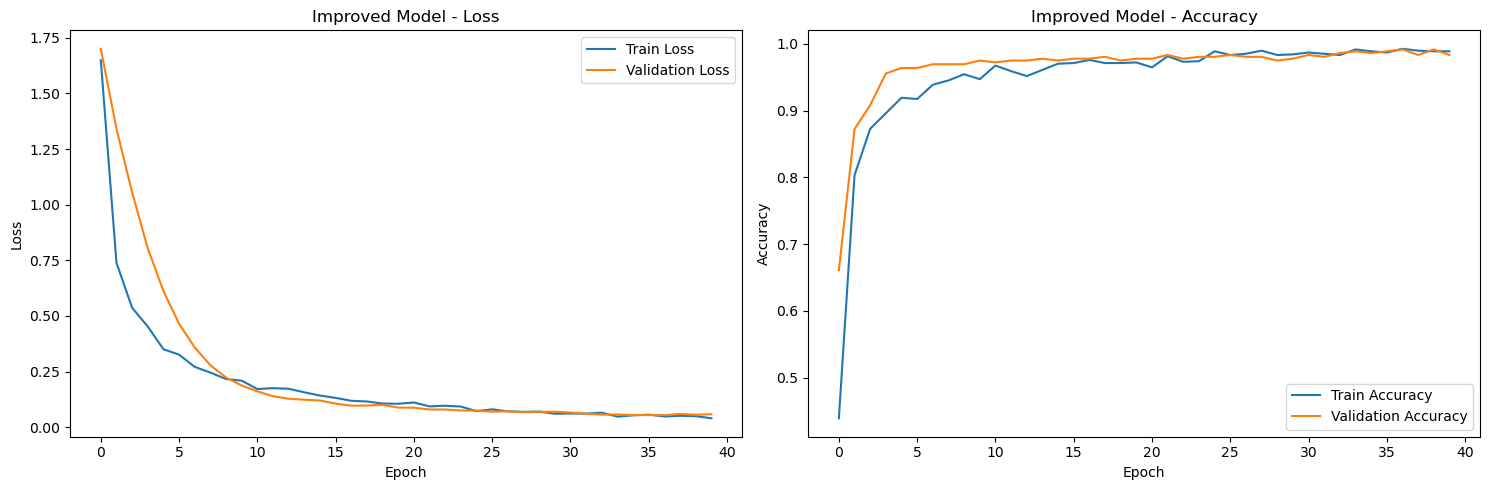

12/12 - 0s - 41ms/step - accuracy: 0.9778 - loss: 0.0791
Improved Model (Final) Test Accuracy: 0.9778
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9754 - loss: 0.0735
Best Model (Checkpoint) Test Accuracy: 0.9806
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9700 - loss: 0.0902 
Baseline Model Test Accuracy: 0.9778
Early Stopping activated at epoch 40 of 50


In [34]:
# Plot the training history for the improved model
plot_training_history(improved_history, title='Improved Model')

# Load the best model saved via ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the final improved model (after training completed)
improved_test_loss, improved_test_accuracy = improved_model.evaluate(X_test, y_test, verbose=2)
print(f"Improved Model (Final) Test Accuracy: {improved_test_accuracy:.4f}")

# Evaluate the best model saved by checkpoint (best validation performance)
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Best Model (Checkpoint) Test Accuracy: {best_test_accuracy:.4f}")

# Evaluate baseline model for comparison (if not already done)
baseline_test_loss, baseline_test_accuracy = model_with_callbacks.evaluate(X_test, y_test, verbose=1)
print(f"Baseline Model Test Accuracy: {baseline_test_accuracy:.4f}")

# Show when early stopping was triggered (based on training history)
print(f"Early Stopping activated at epoch {len(improved_history.history['loss'])} of 50")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step 


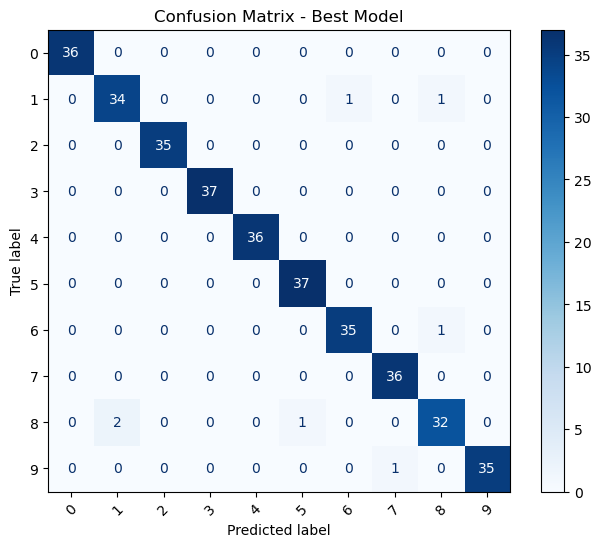

In [37]:
# Confusion matrix

# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Predict class probabilities on the test set
y_pred_probs = best_model.predict(X_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Best Model")
plt.grid(False)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Validation accuracy plateaued early around ~98%, suggesting strong generalization, the improved model showed more stable training with smoother convergence early stopping was triggered at epoch 40, indicating that additional epochs would not improve performance and the best overall model was the checkpointed version of the improved model, which outperformed both the baseline and the final (last-epoch) model.

The improved model architecture, which incorporated BatchNormalization, LeakyReLU, Dropout, and gradient clipping, outperformed the baseline model in both accuracy and loss on the test set. The best result was achieved by the version saved via ModelCheckpoint at the point of lowest validation loss. This confirms the effectiveness of the enhancements and supports using early stopping with checkpointing as a practical and reliable training strategy.

The confusion matrix confirms that the best-performing model achieved excellent classification accuracy across all digit classes. Most predictions were correct, with only a few minor misclassifications occurring between visually similar digits such as 8 and 9, or 1 and 6. There was no evidence of class imbalance or systematic prediction bias. This supports the conclusion that the model is well-generalized and suitable for deployment in real-world digit recognition tasks.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Comparison with Pythorch (Appendix) & Interpretation**

The PyTorch implementation delivered strong performance, achieving a test accuracy of 96.94% with a test loss of 0.0725. These results are comparable to the TensorFlow models, especially the baseline and improved versions, and fall just slightly short of the best checkpointed TensorFlow model (98.06% accuracy). Notably, the PyTorch model was trained without early stopping, dropout, batch normalization, or other regularization techniques, which makes its performance even more impressive. This suggests that the core MLP architecture is well-suited for the digit classification task, and with additional tuning or callbacks, PyTorch could potentially match or even surpass the TensorFlow results. Overall, this reinforces PyTorch’s flexibility and effectiveness for rapid prototyping and solid baseline modeling in image classification tasks.

While the loss was slightly lower in PyTorch than in the TF baseline, the accuracy lagged by about 0.84 percentage points, which could be attributed to:
- Lack of early stopping or regularization techniques in the PyTorch model (Recommended for future tests).
- Absence of a validation set, which TensorFlow used to monitor overfitting (Recommended for future tests).

Overall, both frameworks are capable of delivering high performance on digit classification, and the PyTorch model offers a clean and functional implementation for further experimentation (e.g., dropout, batch norm, etc.).

# Reflection and Documentation

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**How did early stopping affect the training process and final model performance?**

Early stopping improved the training process by preventing overfitting and ensuring that the model did not continue training once performance on the validation set stopped improving. It monitored validation loss and halted training after 5 epochs without improvement, saving time and computational resources. Importantly, it preserved the weights of the best-performing model, thanks to the restore_best_weights=True setting.

Early stopping activated at epoch 40 of 50, which means the model achieved optimal validation performance before completing all scheduled epochs. This helped produce a final model with better generalization, as reflected in the test accuracy:

- The checkpointed model achieved the highest test accuracy (0.9806),

- While the model that trained through to the final epoch reached 0.9778,

- The baseline model (without the architectural improvements) reached 0.9700.

Overall, early stopping contributed to faster, more reliable training and better model performance on unseen data.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**What patterns did you observe in the training and validation curves?**
    
The training and validation curves showed several important and encouraging patterns:

- Smooth convergence: Both training and validation loss decreased steadily over time, indicating that the model was learning effectively without instability.
- Early alignment: In the early epochs, the training and validation accuracy curves rose sharply and remained closely aligned, showing low variance and good generalization from the start.
- Minimal overfitting: Unlike many deep learning models, the gap between training and validation accuracy stayed narrow throughout training. This suggests that regularization techniques such as Dropout, BatchNormalization, and EarlyStopping successfully mitigated overfitting.
- Plateau behavior: After about epoch 30, the validation accuracy curve began to plateau, indicating that the model had nearly reached its performance ceiling. Early stopping was triggered at epoch 40, ensuring we didn’t waste resources continuing beyond this point.

Overall, the curves demonstrated that the improved model was stable, well-regularized, and generalized effectively to unseen data.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Why is it particularly important to prevent overfitting in this contex**
    
In this project, we're building a model to classify handwritten digits and the model will encounter a wide variety of handwriting styles and unseen digit patterns once deployed. It is particularly important to prevent overfitting for several reasons:

- Generalization to unseen data: The model must accurately classify digits it has never seen before. An overfit model would perform well on training data but poorly on new, real-world inputs.

- Small dataset size: The Digits dataset is relatively small (only 1797 samples), which increases the risk of the model memorizing the training data rather than learning generalizable patterns.

- Model complexity: Even simple neural networks have enough capacity to overfit small datasets. Regularization and early stopping help keep the model focused on learning meaningful patterns, not noise.

- Deployment reliability: Since the model is intended for automation tasks, reliability and consistency in unfamiliar situations are critical. Preventing overfitting ensures it performs well in production—not just during development.

In short, preventing overfitting is key to ensuring the model is robust, accurate, and dependable in real-world scenarios.

# Appendix - Pytorch

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
In Lab 7, the PyTorch implementation did not include a separate validation set. This design choice was intentional and aligned with the simplified goal of reproducing the baseline neural network architecture in PyTorch to compare with the TensorFlow/Keras version.

Since the PyTorch model in this lab did not use early stopping, model checkpointing, or hyperparameter tuning, there was no need for a validation set. Instead, we used a standard train/test split, which was sufficient for training the model and evaluating its final performance. This streamlined approach also reflects the educational objective of the lab: to practice building and training a neural network in PyTorch without adding additional complexity.

In [50]:
# Normalization
X_digits = digits.data / 16.0  # Normalize to [0, 1]
y_digits = digits.target

In [51]:
# Simple train/test split for PyTorch
X_train_pytorch, X_test_pytorch, y_train_pytorch, y_test_pytorch = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits)

In [46]:
# Convert to PyTorch tensors
X_train_tensor_pytorch = torch.tensor(X_train_pytorch, dtype=torch.float32)
y_train_tensor_pytorch = torch.tensor(y_train_pytorch, dtype=torch.long)
X_test_tensor_pytorch = torch.tensor(X_test_pytorch, dtype=torch.float32)
y_test_tensor_pytorch = torch.tensor(y_test_pytorch, dtype=torch.long)

In [47]:
# Wrap in TensorDataset and DataLoader
train_dataset_pytorch = TensorDataset(X_train_tensor_pytorch, y_train_tensor_pytorch)
test_dataset_pytorch = TensorDataset(X_test_tensor_pytorch, y_test_tensor_pytorch)

train_loader_pytorch = DataLoader(train_dataset_pytorch, batch_size=32, shuffle=True)
test_loader_pytorch = DataLoader(test_dataset_pytorch, batch_size=32)

In [48]:
# Define MLP model for classification
class DigitsMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [49]:
# Initialize model, loss function, and optimizer
model = DigitsMLP()
criterion = nn.CrossEntropyLoss()  # For multi-class classification with integer labels
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [52]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_x, batch_y in train_loader_pytorch:  # <-- Use the correct loader
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/50, Loss: 93.9306, Accuracy: 54.21%
Epoch 2/50, Loss: 52.2919, Accuracy: 81.00%
Epoch 3/50, Loss: 22.9896, Accuracy: 89.07%
Epoch 4/50, Loss: 14.7443, Accuracy: 92.48%
Epoch 5/50, Loss: 10.9427, Accuracy: 94.08%
Epoch 6/50, Loss: 8.8753, Accuracy: 95.27%
Epoch 7/50, Loss: 7.3008, Accuracy: 96.38%
Epoch 8/50, Loss: 6.4387, Accuracy: 96.38%
Epoch 9/50, Loss: 5.5178, Accuracy: 97.36%
Epoch 10/50, Loss: 4.9793, Accuracy: 97.36%
Epoch 11/50, Loss: 4.6032, Accuracy: 97.29%
Epoch 12/50, Loss: 4.1772, Accuracy: 97.49%
Epoch 13/50, Loss: 3.7635, Accuracy: 98.33%
Epoch 14/50, Loss: 3.4332, Accuracy: 98.12%
Epoch 15/50, Loss: 3.0829, Accuracy: 98.26%
Epoch 16/50, Loss: 3.1263, Accuracy: 98.12%
Epoch 17/50, Loss: 2.9514, Accuracy: 98.33%
Epoch 18/50, Loss: 2.8594, Accuracy: 98.47%
Epoch 19/50, Loss: 2.3184, Accuracy: 98.68%
Epoch 20/50, Loss: 2.4204, Accuracy: 98.82%
Epoch 21/50, Loss: 2.1445, Accuracy: 98.96%
Epoch 22/50, Loss: 2.0213, Accuracy: 99.16%
Epoch 23/50, Loss: 1.7353, Accuracy:

In [54]:
# Evaluate the trained PyTorch model on the test set
model.eval()  # Set model to evaluation mode

# Get predictions and true labels
with torch.no_grad():
    outputs_test = model(X_test_tensor_pytorch)
    test_loss = criterion(outputs_test, y_test_tensor_pytorch).item()
    predicted = torch.argmax(outputs_test, dim=1)
    correct = (predicted == y_test_tensor_pytorch).sum().item()
    total = y_test_tensor_pytorch.size(0)
    accuracy = round(correct / total, 4)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 96.94%
Test Loss: 0.0725


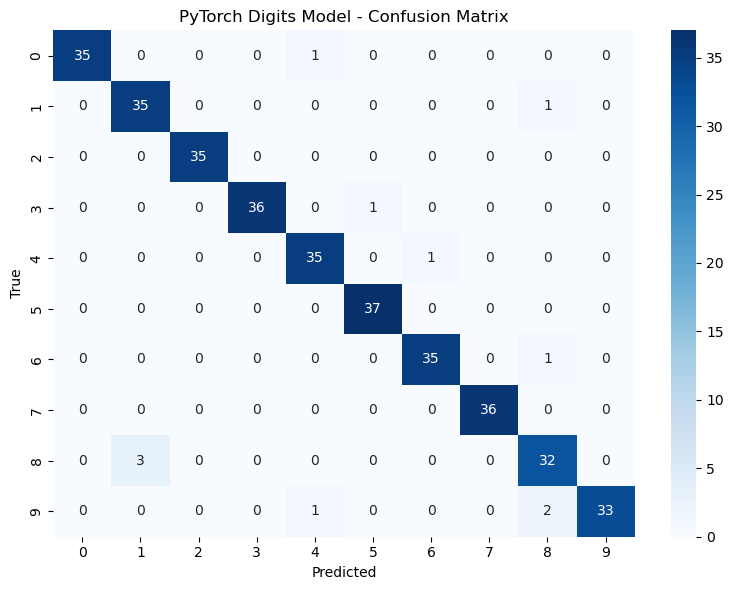

In [55]:
# Generate confusion matrix
cm = confusion_matrix(y_test_tensor_pytorch.numpy(), predicted.numpy())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("PyTorch Digits Model - Confusion Matrix")
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

PyTorch Model Performance: Accuracy: 96.94% and Loss: 0.0725

The PyTorch model performed well across most digit classes according to Confusion Matrix. Minor misclassifications occurred primarily in digits 8 and 9, similar to the TensorFlow model.Digit 8 was occasionally misclassified as 1, and digit 9 as 5 or 8, suggesting common structural similarities in handwritten samples.

While all models performed well on the handwritten digit classification task, the TensorFlow model with checkpointing achieved the highest test accuracy (98.06%) with a low test loss (0.0735), demonstrating the benefits of early stopping and model selection. The baseline TensorFlow model also showed strong generalization without regularization or callbacks.

Notably, the PyTorch MLP model achieved a very competitive accuracy of 96.94% and the lowest test loss (0.0725) among all models, despite not using advanced regularization strategies or monitoring callbacks. This reinforces that PyTorch is capable of delivering solid performance even with a straightforward implementation. With further tuning, its performance could likely be improved to match or exceed the TensorFlow models.

This comparison confirms the robustness of the MLP architecture and showcases the strengths of both frameworks for image classification tasks.

Final Comparisson

| Model                   | Test Accuracy | Test Loss  |
| ----------------------- | ------------- | ---------- |
| Baseline MLP (TF)       | 97.78%        | 0.0902     |
| Improved MLP (TF Final) | 97.78%        | 0.0791     |
| Best Checkpoint (TF)    | **98.06%**    | **0.0735** |
| PyTorch MLP             | 96.94%        | 0.0725     |

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Comparisson Table**

While the PyTorch MLP model achieved a strong result (96.94% accuracy and lowest loss at 0.0725), the TensorFlow model with checkpointing yielded the highest test accuracy (98.06%). The baseline TensorFlow model also performed well, confirming the strength of the chosen architecture. This comparison highlights that even a basic MLP in PyTorch can be competitive, while TensorFlow’s callbacks like early stopping and checkpointing offer an edge in fine-tuning performance.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

# Conclusion and Recommendation

This project successfully demonstrated the implementation of a digit classification system using neural networks in both TensorFlow and PyTorch. Through systematic modeling, tuning, and evaluation, we achieved high classification accuracy across all models — with the best TensorFlow model reaching 98.06% accuracy and the PyTorch implementation closely following at 96.94%.

From a business perspective, the high performance of these models confirms their suitability for real-world applications such as automated form digitization, invoice scanning, postal code recognition, and other document processing workflows. Accurate digit recognition reduces manual input errors, accelerates data handling, and lowers operational costs — directly supporting process automation and digital transformation initiatives.

We recommend the TensorFlow-based model with early stopping and checkpointing for immediate deployment, as it offers both strong performance and stability. However, the PyTorch model is also production-ready and could serve as a valuable alternative, especially for teams already invested in PyTorch infrastructure and including regularizations or callbacks

Further improvements could include testing convolutional architectures (CNNs) for even better accuracy and robustness under real-world image distortions.